# 🧮 BMI Calculator – Linear Sequential Workflow

## 📌 Problem Statement

Design a basic LangGraph-inspired workflow for a BMI calculator using a linear, sequential approach. The system should simulate node-based processing through clear steps:

1. **Input Node**  
   Accept user inputs: `height` in centimeters and `weight` in kilograms.

2. **Notes Node**  
   Store the input values into a structured format (e.g., a dictionary) to simulate a note-taking node.

3. **Calculation Node**  
   Compute the Body Mass Index (BMI) using the formula:  
   \[
   BMI = \frac{weight\_kg}{(height\_m)^2}
   \]  
   where height is converted from centimeters to meters.

4. **Output Node**  
   Display the calculated BMI along with an interpretation category:
   - Underweight
   - Normal weight
   - Overweight
   - Obese

This workflow should be implemented in a modular Jupyter Notebook format, using clear code cells to reflect each node's logic.

In [1]:
from langgraph.graph import StateGraph , END
from typing import TypedDict
from dotenv import load_dotenv
load_dotenv()

from langchain_openai import ChatOpenAI
from langchain.schema import HumanMessage, SystemMessage

In [5]:
llm = ChatOpenAI()

class State(TypedDict):
    weight: float
    height:  float
    BMI : float
    set_lable : str
    advice : str

def calculate_bmi(state : State) -> State:
    bmi_score = round(state["weight"]/(state["height"]**2),2)
    state["BMI"] = bmi_score
    return state

def set_lable(state: State) -> State:
    if state["BMI"] > 25:
        state["set_lable"] = "Overweight"
    elif state["BMI"] > 20:
        state["set_lable"] = "Normal"
    else:
        state["set_lable"] = "Underweight"
    return state

def advice(state: State) -> State:
    if state["BMI"] > 25:
        prompt = "The user's BMI is high. Suggest 3 actionable tips to reduce it."
    elif state["BMI"] < 20:
        prompt = "The user's BMI is low. Suggest 3 actionable tips to increase it."
    else:
        prompt = "The user's BMI is normal. Suggest 3 tips to maintain it."

    response = llm.invoke([HumanMessage(content= prompt)])
    state['advice'] = response.content
    return state



graph = StateGraph(State)

graph.add_node("calculate_bmi", calculate_bmi)
graph.add_node("labels", set_lable)
graph.add_node("give_advice", advice)
graph.add_edge("calculate_bmi","labels" )
graph.add_edge("labels", "give_advice")
graph.set_entry_point("calculate_bmi")

app = graph.compile()


In [8]:
input_state = {"weight": 88, "height": 1.66}

In [10]:
result = app.invoke(input_state)
print (result["advice"])

1. Increase physical activity: Engage in regular exercise such as walking, jogging, cycling, swimming, or any other form of physical activity that you enjoy. Aim for at least 30 minutes of moderate-intensity exercise most days of the week to help burn calories and improve overall health.

2. Make healthier food choices: Focus on eating a balanced diet that includes plenty of fruits, vegetables, whole grains, lean proteins, and healthy fats. Avoid highly processed foods, sugary beverages, and excessive amounts of unhealthy fats and sugars. Keep track of your caloric intake and aim to create a calorie deficit to help you lose weight.

3. Seek support: Consider seeking the help of a registered dietitian or a personal trainer to help you create a personalized plan for achieving a healthier BMI. Joining a support group or finding a buddy to exercise with can also provide motivation and accountability as you work towards your health goals. Remember that it's important to make sustainable lif

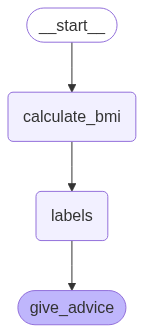

In [11]:
from IPython.display import Image
Image(app.get_graph().draw_mermaid_png())

---

### ***LLM Simple Workflow***

In [ ]:
class QAstate(TypedDict):
    question : str
    answer : str

def qa_bot(state:QAstate)-> QAstate:
    user_q = state["question"]
    bot_a = llm.invoke(user_q).content
    state['answer'] = bot_a
    return state

graph = StateGraph(QAstate)

graph.add_node("qa", qa_bot)
graph.set_entry_point("qa")

app = graph.compile()
# Run in a loop
while True:
    user_input = input("Please enter the question (type 'end' to stop): ")
    if user_input.lower().strip() in ("end", "exit", "quit"):
        break
    else:
        output = app.invoke({"question": user_input, "answer": ""})
        print("Question:", output['question'])
        print("Answer:", output["answer"])

Question: {'question': 'what is the capital of nepa;?', 'answer': 'The capital of Nepal is Kathmandu.'}
Answer: The capital of Nepal is Kathmandu.


---

## ***Prompt Chaining***

In [26]:
from langgraph.graph import START, END, StateGraph

In [27]:
class BlogState(TypedDict):
    topic : str
    outline : str
    content : str

In [ ]:
def generate_outline(state:BlogState)-> BlogState   :
    user_topic = state['topic']
    prompt  = f"Generate an outline for writing a blog on the topic {user_topic}"
    response = llm.invoke(prompt)
    state['outline'] = response.content
    return state

def generate_blog(state:BlogState)-> BlogState:
    outline_topic = state['outline']
    prompt_1  = f"Generate an blog based on the outline that is {outline_topic}. the blog should be 100 words"
    response_1 = llm.invoke(prompt_1)
    state['content'] = response_1.content
    return state



In [33]:
graph = StateGraph(BlogState)

graph.add_node("outlines", generate_outline)
graph.add_node("blog", generate_blog)
graph.set_entry_point("outlines")

graph.add_edge("outlines", "blog")
graph.add_edge("blog", END)

app = graph.compile()

In [34]:
app.invoke({"topic":"Rajma Chawak"})

{'topic': 'Rajma Chawak',
 'outline': 'I. Introduction\n    A. Brief explanation of what rajma chawal is\n    B. Personal connection to the dish\n\nII. History of Rajma Chawal \n    A. Origin of the dish \n    B. Cultural significance \n    C. How it has evolved over time \n\nIII. Ingredients and Preparation \n    A. List of ingredients commonly used \n    B. Step-by-step guide on how to make rajma chawal \n    C. Tips for cooking the dish perfectly \n\nIV. Health Benefits \n    A. Nutritional value of rajma chawal \n    B. How it fits into a balanced diet \n    C. Potential health benefits of the ingredients \n\nV. Variations of Rajma Chawal \n    A. Regional variations \n    B. Different ways to flavor the dish \n    C. Vegan or vegetarian alternatives \n\nVI. Serving Suggestions \n    A. Side dishes that complement rajma chawal \n    B. Garnishes and toppings \n    C. Beverage pairings \n\nVII. Rajma Chawal in Popular Culture \n    A. References to the dish in movies, books, and mus